In [32]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [33]:
#loading dataset
df=pd.read_csv("../customer_support_tickets_dirty.csv")

In [34]:

df.head(10)

,text,label,ticket_id,agent_name
0,Where can I find API rate limits documentation?,Othr,1000,Dana
1,Can I migrate data from Freshdesk?,Othr,1001,Bob
2,Cannot update billing address; page keeps relo...,billing,1002,Charlie
3,Looking for a product roadmap or upcoming feat...,other,1003,Dana
4,Dark mode toggled but UI stays light.,Tech-support,1004,Alice
5,Promo code SPRING15 not applied at checkout.,billing,1005,Alice
6,Incorrect role assigned; need admin access for...,account,1006,Dana
7,File export to CSV generates corrupted file.,technical,1007,Dana
8,Overcharged by GHS 120 on my last bill. 😡,billing,1008,Dana
9,NaN,account,1009,Dana


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        495 non-null    object
 1   label       495 non-null    object
 2   ticket_id   520 non-null    int64 
 3   agent_name  520 non-null    object
dtypes: int64(1), object(3)
memory usage: 16.4+ KB


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ticket_id,495.0,1258.719192,149.68742,1000.0,1131.5,1257.0,1388.0,1519.0


In [37]:
#checking for null values
df.isna().sum()

text          25
label         25
ticket_id      0
agent_name     0
dtype: int64

In [39]:
#checking for duplicated 
df.duplicated().sum()

#the results show there are no duplicate values

0

In [40]:
#checking for unique vales
#after checking it is noticed that some values must be corrected
print(df['label'].unique())

['Othr' 'billing' 'other' 'Tech-support' 'account' 'technical' 'Accnt'
 'OTHER' 'TECHNICAL' 'ACCOUNT' 'BILLING' 'Other ' nan 'Billng' 'Billing '
 ' Account ' ' Tech']


In [41]:
#forging various lables into a common lable value and replacing nan values with 'Special Case'
df['label'] = df['label'].replace({'Othr': 'Other', 'other': 'Other', 'OTHER':'Other', 'Other ':'Other'})

df['label'] = df['label'].replace({'billing': 'Billing', 'BILLING': 'Billing', 'Billng':'Billing', 'Billing ':'Billing'})

df['label'] = df['label'].replace({'account': 'Accounts', 'ACCOUNT': 'Accounts', 'Accnt':'Accounts', ' Account ':'Accounts'})

df['label'] = df['label'].replace({' Tech': 'Technical Support', 'Tech-support': 'Technical Support', 'TECHNICAL':'Technical Support', 'technical':'Technical Support'})

df['label'] = df['label'].fillna('Special Case')


print(df['label'].unique())

['Other' 'Billing' 'Technical Support' 'Accounts' 'Special Case']


In [44]:
df.isnull().sum()


text          25
label          0
ticket_id      0
agent_name     0
dtype: int64

In [51]:
#dropping nan values in the text column. 
#we still have null values in the text column. 
# we cannot know what queries thos tickets have so it will be better to drop them.

df = df.dropna()

In [53]:
#checking for empty values after dropping nan values
df.isna().sum()

text          0
label         0
ticket_id     0
agent_name    0
dtype: int64

In [54]:
#checking for unique values of agent names
print(df['agent_name'].unique())

['Dana' 'Bob' 'Charlie' 'Alice']


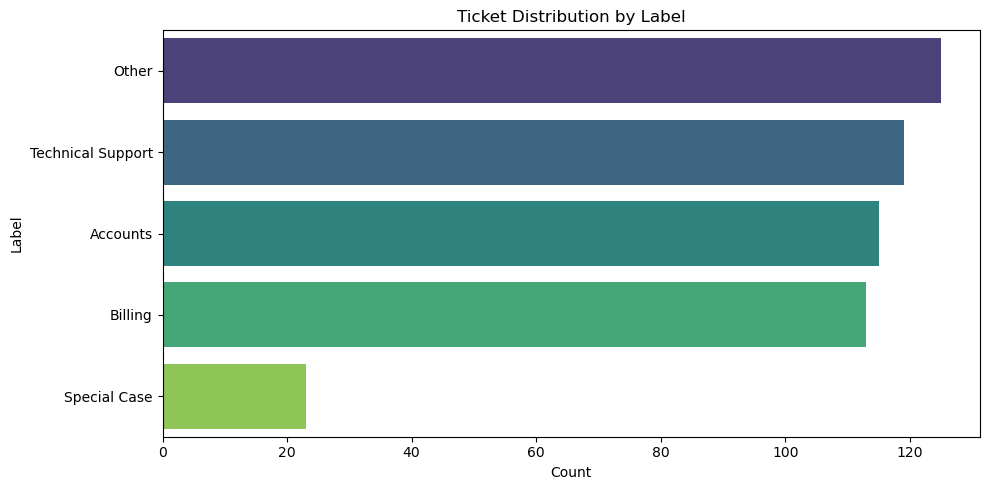

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(
    y='label',
    data=df,
    order=df['label'].value_counts().index,
    palette='viridis'
)
plt.title('Ticket Distribution by Label')
plt.xlabel('Count')
plt.ylabel('Label')
plt.tight_layout()
plt.show()

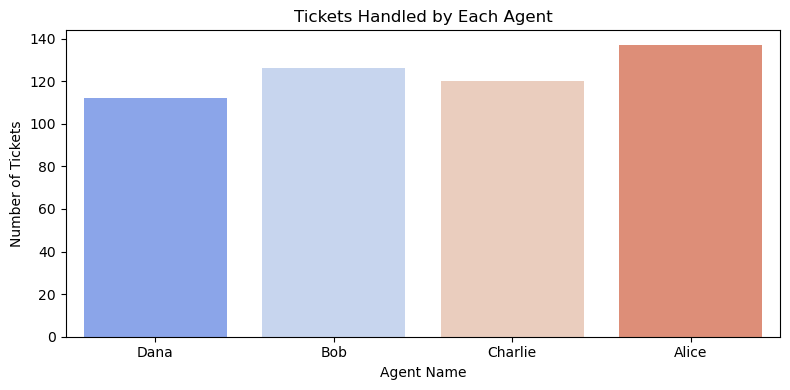

In [56]:
plt.figure(figsize=(8, 4))
sns.countplot(x='agent_name', data=df, palette='coolwarm')
plt.title('Tickets Handled by Each Agent')
plt.xlabel('Agent Name')
plt.ylabel('Number of Tickets')
plt.tight_layout()
plt.show()